# Import libraries & load dataset

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_classification

In [3]:
#load dataset(2017-2022)

df=pd.read_csv('/My Drive/A_2023FallUMBC/Capstone/dataset/final/transform_dataset.csv', encoding='cp1252',low_memory=False)

In [4]:
df.head(20)

,index,sex,obese,physical_activity,alcohol,stroke,depression,kidney_disease,heart_disease,DM,...,marital_4.0,marital_5.0,marital_6.0,healthcare_access_1.0,healthcare_access_2.0,healthcare_access_3.0,smoking_1.0,smoking_2.0,smoking_3.0,dementia
0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5,5,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,6,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,7,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
8,8,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [84]:
print(df.shape)
print(df.columns)

(67200, 50)
Index(['index', 'sex', 'obese', 'physical_activity', 'alcohol', 'stroke',
       'depression', 'kidney_disease', 'heart_disease', 'DM', 'age_1.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0',
       'race_2.0', 'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0',
       'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0',
       'employ_8.0', 'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0',
       'income_1.0', 'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0',
       'marital_1.0', 'marital_2.0', 'marital_3.0', 'marital_4.0',
       'marital_5.0', 'marital_6.0', 'healthcare_access_1.0',
       'healthcare_access_2.0', 'healthcare_access_3.0', 'smoking_1.0',
       'smoking_2.0', 'smoking_3.0', 'dementia'],
      dtype='object')


In [ ]:
#check distribution of education catogary 
educag_columns = ['educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0']

# Filter the DataFrame based on the condition df['dementia'] == 1
filtered_df = df[df['dementia'] == 1]

# Count the occurrences of different values 

# .apply(lambda col: col.value_counts()): This applies the value_counts 
#function to each column separately to count the occurrences of different values in each column.
value_counts_result = filtered_df[educag_columns].apply(lambda col: col.value_counts())

print('f value_counts_result:', value_counts_result)


# Calculate the percentage distribution for each column
percentage_distribution = filtered_df[educag_columns].apply(lambda col: col.value_counts(normalize=True) * 100)

# Print the result
print('f percentage_distribution:', percentage_distribution)

#educag_4.0 means Graduated from College or Technical School.



# Chi-Square Test

In [86]:
from scipy.stats import chi2_contingency
# realtionship between dementia and higher education
# Create a contingency table
contingency_table = pd.crosstab(df['dementia'], df['educag_4.0'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Value: {chi2}')
print(f'p-value: {p}')


Chi-Square Value: 136.67254719888734
p-value: 1.4220385869076e-31


In [148]:
#Relationship between dementia and employed
#Create a contingency table
contingency_table = pd.crosstab(df['dementia'], df['employ_1.0'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Value: {chi2}')
print(f'p-value: {p}')


Chi-Square Value: 15.667942714680876
p-value: 7.549294047951939e-05


In [154]:
#Relationship between dementia and imcome
#income_5.0=$50K or more
#Create a contingency table
contingency_table = pd.crosstab(df['dementia'], df['income_5.0'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Value: {chi2}')
print(f'p-value: {p}')

Chi-Square Value: 66.19958901226374
p-value: 4.0749752197681647e-16


In [153]:
#Relationship between dementia and race
#race_1.0=white
#Create a contingency table
contingency_table = pd.crosstab(df['dementia'], df['race_1.0'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Value: {chi2}')
print(f'p-value: {p}')

Chi-Square Value: 10.700646021852323
p-value: 0.0010709813102341681


In [87]:
df.columns

Index(['index', 'sex', 'obese', 'physical_activity', 'alcohol', 'stroke',
       'depression', 'kidney_disease', 'heart_disease', 'DM', 'age_1.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0',
       'race_2.0', 'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0',
       'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0',
       'employ_8.0', 'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0',
       'income_1.0', 'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0',
       'marital_1.0', 'marital_2.0', 'marital_3.0', 'marital_4.0',
       'marital_5.0', 'marital_6.0', 'healthcare_access_1.0',
       'healthcare_access_2.0', 'healthcare_access_3.0', 'smoking_1.0',
       'smoking_2.0', 'smoking_3.0', 'dementia'],
      dtype='object')

In [88]:
x=df[['sex', 'obese', 'physical_activity', 'alcohol',
       'stroke', 'depression', 'kidney_disease', 'heart_disease', 'DM',
       'age_1.0', 'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0',
       'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'employ_1.0',
       'employ_2.0', 'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0',
       'employ_7.0', 'employ_8.0', 'educag_1.0', 'educag_2.0', 'educag_3.0',
       'educag_4.0', 'income_1.0', 'income_2.0', 'income_3.0', 'income_4.0',
       'income_5.0', 'marital_1.0', 'marital_2.0', 'marital_3.0',
       'marital_4.0', 'marital_5.0', 'marital_6.0', 'healthcare_access_1.0',
       'healthcare_access_2.0', 'healthcare_access_3.0', 'smoking_1.0',
       'smoking_2.0', 'smoking_3.0']]
y=df[['dementia']]

In [89]:
x.head()

,sex,obese,physical_activity,alcohol,stroke,depression,kidney_disease,heart_disease,DM,age_1.0,...,marital_3.0,marital_4.0,marital_5.0,marital_6.0,healthcare_access_1.0,healthcare_access_2.0,healthcare_access_3.0,smoking_1.0,smoking_2.0,smoking_3.0
0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [90]:
x.shape

(67200, 48)

In [47]:
y.head()

,dementia
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


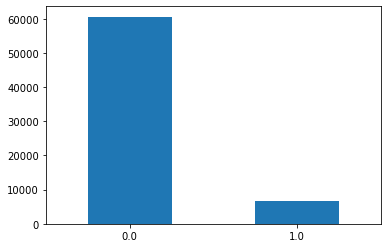

0.0    60597
1.0     6603
Name: dementia, dtype: int64


In [61]:
fig, ax = plt.subplots(figsize=(6,4))
df['dementia'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

print(df['dementia'].value_counts())

# Imbalaced Class
## combined method(oversample and undersample)
Tomek Links: Identify pairs of instances (one from each class) that are close to each other and remove the majority class instance.

SMOTE (Synthetic Minority Over-sampling Technique):Generate synthetic samples for the minority class based on the feature space.SMOTE creates synthetic instances along the line segments connecting existing minority class instances.

In [91]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

In [92]:
#deal with imbalaced class
import imblearn

# find class distribution ratio
df['dementia'].value_counts()
inactive= len(df[df['dementia']==0])
active=len(df[df['dementia']==1])
class_distribution_ratio = inactive/active
class_distribution_ratio

# a ratio of 9:1 for the majority to the minority class

9.177192185370286

In [93]:
# split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5599)

# Calculate the ratio= 1:5 minority:majority
desired_ratio = {1: len(y_train) // 5, 0: len(y_train)}

# Instantiate SMOTE and TomekLinks with desired ratio
smote = SMOTE(sampling_strategy=desired_ratio,random_state=5599)
# This removes Tomek links from the majority class
tomek = TomekLinks(sampling_strategy='majority')  


# Apply SMOTE followed by TomekLinks to the training data
smote_tomek = SMOTETomek(smote=smote, tomek=tomek)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))


Class distribution after resampling: Counter({'dementia': 1})


In [94]:
# Summarize the new class distribution if needed
print(y_resampled.value_counts())
print(x.shape)
print(X_resampled.shape)
print(y_resampled.shape)

dementia
0.0         46900
1.0          9408
dtype: int64
(67200, 48)
(56308, 48)
(56308, 1)


In [132]:
X_resampled.columns

Index(['sex', 'obese', 'physical_activity', 'alcohol', 'stroke', 'depression',
       'kidney_disease', 'heart_disease', 'DM', 'age_1.0', 'age_2.0',
       'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0', 'race_2.0',
       'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0', 'employ_3.0',
       'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0', 'employ_8.0',
       'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0', 'income_1.0',
       'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0', 'marital_1.0',
       'marital_2.0', 'marital_3.0', 'marital_4.0', 'marital_5.0',
       'marital_6.0', 'healthcare_access_1.0', 'healthcare_access_2.0',
       'healthcare_access_3.0', 'smoking_1.0', 'smoking_2.0', 'smoking_3.0'],
      dtype='object')

In [95]:
print(X_test.shape)

(20160, 48)


In [152]:
print(y_test.value_counts())

dementia
0.0         18220
1.0          1940
dtype: int64


In [151]:
# find class distribution ratio
y_test.value_counts()
inactive= len(y_test==0)
active=len(y_test==1)
class_distribution_ratio = inactive/active
class_distribution_ratio

1.0

# Classification

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier
                             )
from sklearn.svm import SVC

In [96]:
# Reshape numerical data to 1-dimensional array
# ravel() function to flatten the target variable into a 1D array
y_numerical = y_resampled.to_numpy().ravel()

In [69]:
y_numerical

array([0., 0., 0., ..., 1., 1., 1.])

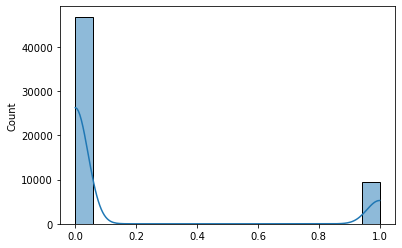

In [97]:
# make a plot fory_numerical 
sns.histplot(y_numerical, kde=True)
plt.show()

## Logistic regression

In [114]:
# For classification, using logistic regression, random forest, decision tree, gradient boosting machine(GBM)
#final use X_resampled, y_numerical for training models


#Logistic regression
lg_pipeline = make_pipeline(PolynomialFeatures(2), OneVsOneClassifier(LogisticRegression(max_iter=2000)))

# make predictions using cross-validation
y_pred = cross_val_predict(lg_pipeline, X_resampled, y_numerical, cv=10)

# Evaluate the model
accuracy =accuracy_score(y_numerical, y_pred)
print(f'Accuracy:{accuracy:.2f}')

#print classification report
print(classification_report(y_numerical, y_pred))

Accuracy:0.84
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     46900
         1.0       0.53      0.18      0.27      9408

    accuracy                           0.84     56308
   macro avg       0.69      0.57      0.59     56308
weighted avg       0.80      0.84      0.80     56308



## Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for hyperparameter tuning
param = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', None],
    'criterion': ['gini', 'entropy'] #'gini' for the Gini impurity and 'entropy' for information gain. 
}

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param, scoring='f1', cv=10)
grid_search.fit(X_resampled, y_numerical)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [100]:
#using best hyperparameters
# best hyperparameters: 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2
dt_best= grid_search.best_estimator_


# make predictions on the training dataset
y_dt_best_pred = dt_best.predict(X_resampled)

print(classification_report(y_numerical, y_dt_best_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     46900
         1.0       0.98      0.63      0.77      9408

    accuracy                           0.94     56308
   macro avg       0.96      0.81      0.87     56308
weighted avg       0.94      0.94      0.93     56308



In [155]:
from joblib import dump

#save decision tree model
#train model
dt_best.fit(X_resampled, y_numerical)

# Save the model to a file
dump(dt_best, 'dt_best_model.joblib')


#load model
#from joblib import load
# Load the model from the file
#loaded_model = load('dt_best_model.joblib')

# Then, use 'loaded_model' for predictions or other tasks



['dt_best_model.joblib']

## Random Forest

In [101]:
#Random Forest
rf = RandomForestClassifier()

# train the Random Forest classifier on the training data
rf.fit(X_resampled, y_numerical)

#make prediction
y_rf_pred = cross_val_predict(rf, X_resampled, y_numerical, cv=10)

# Evaluate the model
accuracy =accuracy_score(y_numerical,y_rf_pred)
print(f'Accuracy:{accuracy:.2f}')

print(classification_report(y_numerical, y_rf_pred))

Accuracy:0.86
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     46900
         1.0       0.70      0.33      0.45      9408

    accuracy                           0.86     56308
   macro avg       0.79      0.65      0.69     56308
weighted avg       0.85      0.86      0.84     56308



In [105]:
#RandomForest
# find best hyperparameter

scores = {}
from sklearn.ensemble import RandomForestClassifier
param = {
    'n_estimators': [100, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']  # Number of features to consider when looking for the best split
}

rf = RandomForestClassifier()
grid = GridSearchCV(estimator =rf, param_grid= param, cv=10, verbose=3, scoring='f1')
grid.fit(X_resampled, y_numerical)
best_estimator_candidates = [(grid.best_estimator_, grid.best_score_)]

# print best hyperparameter
print('Best Hyperparameters:', grid.best_params_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.059 total time=   7.0s
[CV 2/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.076 total time=   6.6s
[CV 3/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.068 total time=   6.7s
[CV 4/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.063 total time=   6.8s
[CV 5/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.099 total time=   6.5s
[CV 6/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.705 total time=   8.7s
[CV 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estim

In [106]:
# Using best hyperparameter to build the Random Forest Classifier model
# max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
                        
rf_best= grid.best_estimator_


# make predictions on the training dataset
y_rf_best_pred = rf_best.predict(X_resampled)

print(classification_report(y_numerical, y_rf_best_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     46900
         1.0       0.97      0.64      0.77      9408

    accuracy                           0.94     56308
   macro avg       0.95      0.82      0.87     56308
weighted avg       0.94      0.94      0.93     56308



In [156]:
#save Random Forest model
#train model
rf_best.fit(X_resampled, y_numerical)

# Save the model to a file
dump(rf_best, 'rf_best_model.joblib')

['rf_best_model.joblib']

##  Gradient boosting machine(GBM)
using GradientBoostingClassifier and xgboost

In [102]:
from sklearn.ensemble import (GradientBoostingClassifier)

clf_gbm = GradientBoostingClassifier(n_estimators=100, random_state=5599,
                                     max_depth=8,
                                     max_features='sqrt')

y_gbm_pred = cross_val_predict(clf_gbm , X_resampled, y_numerical,cv=10)
print(classification_report(y_numerical, y_gbm_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     46900
         1.0       0.54      0.26      0.35      9408

    accuracy                           0.84     56308
   macro avg       0.70      0.61      0.63     56308
weighted avg       0.81      0.84      0.82     56308



In [78]:
!pip install xgboost


In [ ]:
 # max_depth=None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200
                        
xgb_best= grid_search.best_estimator_


# make predictions on the training dataset
y_xgb_best_pred = xgb_best.predict(X_resampled)

print(classification_report(y_numerical, y_xgb_best_pred ))

## Most important features

In [ ]:
#best model
#rf_best
#dt_best

#Training dataset: X_resampled, y_numerical

In [107]:
#feature names
features=['age','sex','race','employ','educag','income','marital','healthcare_access','obese','physical_activity','smoking','alcohol',
                  'stroke','depression','kidney_disease','DM','heart_disease']

rf_best.fit(X_resampled, y_numerical)
feature_importance =rf_best.feature_importances_
for feature_name, importance_score in zip(features, feature_importance):
    print(f"{feature_name}: {importance_score}")

age: 0.0270831451840091
sex: 0.06462960769581481
race: 0.052683145289949926
employ: 0.06784315909031553
educag: 0.016877068236926914
income: 0.057965086969398255
marital: 0.020566842593156078
healthcare_access: 0.02544280251161013
obese: 0.04654254518013469
physical_activity: 0.005252179104855784
smoking: 0.009662493773100378
alcohol: 0.013702706395674556
stroke: 0.015238767603373027
depression: 0.020389205430464623
kidney_disease: 0.015713825611692486
DM: 0.02075753374983909
heart_disease: 0.015702566202278858


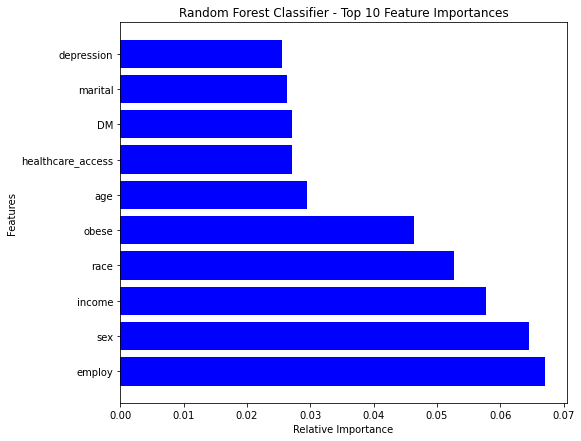

<Figure size 432x288 with 0 Axes>

In [123]:
#make a plot for feature importance in RF model
rf_best.fit(X_resampled, y_numerical)

importance_of_feature = rf_best.feature_importances_

# Assuming 'features' is a list of feature names
#features = [f"Features {i}" for i in range(len(importance_of_feature))]  # Replace with your actual feature names
features=['age','sex','race','employ','educag','income','marital','healthcare_access','obese','physical_activity','smoking','alcohol',
                  'stroke','depression','kidney_disease','DM','heart_disease']


# Assuming to plot the top N features (e.g., N=18)
top_n = 10

# Sort features based on importance and select the top N
top_features = [feature for _, feature in sorted(zip(importance_of_feature, features), reverse=True)[:top_n]]

# take_top_N features
plt.figure(figsize=(8,7))
plt.title('Random Forest Classifier - Top 10 Feature Importances'.format(top_n))
plt.ylabel('Features')

# create a horizontal bar chart
plt.barh(np.arange(top_n), sorted(importance_of_feature, reverse=True)[:top_n], color='b', align='center')
plt.yticks(np.arange(top_n), top_features)
plt.xlabel('Relative Importance')
plt.show()

plt.savefig('Feature_importance_RF.png')

###  Feature importance for DT model

In [109]:
#feature names
features=['age','sex','race','employ','educag','income','marital','healthcare_access','obese','physical_activity','smoking','alcohol',
                  'stroke','depression','kidney_disease','DM','heart_disease']

dt_best.fit(X_resampled, y_numerical)
feature_importance =dt_best.feature_importances_
for feature_name, importance_score in zip(features, feature_importance):
    print(f"{feature_name}: {importance_score}")

age: 0.026877697532598582
sex: 0.06882895148803746
race: 0.04207867346455432
employ: 0.06568913821250852
educag: 0.016915166992346523
income: 0.06286552385869736
marital: 0.022110416124371597
healthcare_access: 0.026626385742878997
obese: 0.047918385459599394
physical_activity: 0.005131642954975835
smoking: 0.01100005416012586
alcohol: 0.019037752542332434
stroke: 0.01677982141391258
depression: 0.021429585735471112
kidney_disease: 0.014634039126062676
DM: 0.021371917499421293
heart_disease: 0.014625886087492677


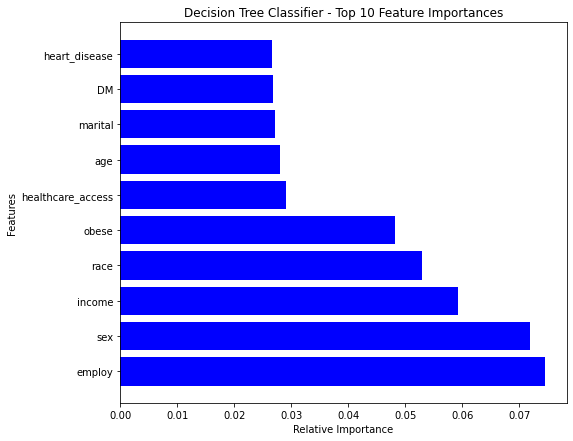

<Figure size 432x288 with 0 Axes>

In [122]:
#make a plot for feature importance in DT model
dt_best.fit(X_resampled, y_numerical)

importance_of_feature = dt_best.feature_importances_

# Assuming 'features' is a list of feature names
#features = [f"Features {i}" for i in range(len(importance_of_feature))]  # Replace with your actual feature names
features=['age','sex','race','employ','educag','income','marital','healthcare_access','obese','physical_activity','smoking','alcohol',
                  'stroke','depression','kidney_disease','DM','heart_disease']


# Assuming you want to plot the top N features (e.g., N=18)
top_n = 10

# Sort features based on importance and select the top N
top_features = [feature for _, feature in sorted(zip(importance_of_feature, features), reverse=True)[:top_n]]

# take_top_N features
plt.figure(figsize=(8,7))
plt.title('Decision Tree Classifier - Top 10 Feature Importances'.format(top_n))
plt.ylabel('Features')

# create a horizontal bar chart
plt.barh(np.arange(top_n), sorted(importance_of_feature, reverse=True)[:top_n], color='b', align='center')
plt.yticks(np.arange(top_n), top_features)
plt.xlabel('Relative Importance')
plt.show()

plt.savefig('Feature_importance_DT.png')

# Evaluation by using test dataset

In [116]:
##Logistic regression
lg_pipeline.fit(X_resampled,  y_numerical)
y_LR_test_pred = lg_pipeline.predict(X_test)
print(classification_report(y_LR_test_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     20158
         1.0       0.00      0.50      0.00         2

    accuracy                           0.90     20160
   macro avg       0.50      0.70      0.48     20160
weighted avg       1.00      0.90      0.95     20160



In [117]:
# The final model!!
# Random Forest with tuning
y_rf_test_pred = rf_best.predict(X_test)
print(classification_report(y_rf_test_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     19851
         1.0       0.02      0.12      0.03       309

    accuracy                           0.89     20160
   macro avg       0.50      0.51      0.49     20160
weighted avg       0.97      0.89      0.93     20160



In [118]:
# Decision tree
y_dt_test_pred = dt_best.predict(X_test)
print(classification_report(y_dt_test_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92     19062
         1.0       0.05      0.09      0.07      1098

    accuracy                           0.86     20160
   macro avg       0.50      0.50      0.50     20160
weighted avg       0.90      0.86      0.88     20160



In [119]:
#GBM

clf_gbm.fit(X_resampled,  y_numerical)
y_grd_test_pred = clf_gbm.predict(X_test)
print(classification_report(y_grd_test_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     20159
         1.0       0.00      0.00      0.00         1

    accuracy                           0.90     20160
   macro avg       0.50      0.45      0.47     20160
weighted avg       1.00      0.90      0.95     20160



In [120]:
#xgboos
xgb_classifier.fit(X_resampled,  y_numerical)
y_xgb_test_pred = xgb_classifier.predict(X_test)
print(classification_report(y_xgb_test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20158
           1       0.00      0.00      0.00         2

    accuracy                           0.90     20160
   macro avg       0.50      0.45      0.47     20160
weighted avg       1.00      0.90      0.95     20160



## Validation
using 2015 and 2016 dataset to validate final model

In [9]:
pwd

'G:\\My Drive\\A_2023FallUMBC\\Capstone\\dataset\\final'

In [10]:
#load newdataset(2015 & 2016) for validation
v_df= pd.read_csv('G:\\My Drive\\\A_2023FallUMBC/Capstone/dataset/final/transform_V_dataset.csv', encoding='cp1252',low_memory=False)

In [11]:
print(v_df.shape)
v_df.head(20)

(34051, 50)


,index,sex,obese,physical_activity,alcohol,stroke,depression,kidney_disease,heart_disease,DM,...,marital_4.0,marital_5.0,marital_6.0,healthcare_access_1.0,healthcare_access_2.0,healthcare_access_3.0,smoking_1.0,smoking_2.0,smoking_3.0,dementia
0,15,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,27,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,34,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,37,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,44,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,46,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,51,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
8,56,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,60,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
v_df.columns

Index(['index', 'sex', 'obese', 'physical_activity', 'alcohol', 'stroke',
       'depression', 'kidney_disease', 'heart_disease', 'DM', 'age_1.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0',
       'race_2.0', 'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0',
       'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0',
       'employ_8.0', 'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0',
       'income_1.0', 'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0',
       'marital_1.0', 'marital_2.0', 'marital_3.0', 'marital_4.0',
       'marital_5.0', 'marital_6.0', 'healthcare_access_1.0',
       'healthcare_access_2.0', 'healthcare_access_3.0', 'smoking_1.0',
       'smoking_2.0', 'smoking_3.0', 'dementia'],
      dtype='object')

In [140]:
v_df['dementia'].value_counts()

0.0    30674
1.0     3377
Name: dementia, dtype: int64

In [12]:
from joblib import load

# Load the saved fianl rf best model
rf_best_model = load('G:\\My Drive\\A_2023FallUMBC/Capstone/dataset/final/rf_best_model.joblib')

In [18]:
#using rf_best model
#fianl model

# validation dataset
X_val=v_df[['sex', 'obese', 'physical_activity', 'alcohol', 'stroke',
       'depression', 'kidney_disease', 'heart_disease', 'DM', 'age_1.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0',
       'race_2.0', 'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0',
       'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0',
       'employ_8.0', 'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0',
       'income_1.0', 'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0',
       'marital_1.0', 'marital_2.0', 'marital_3.0', 'marital_4.0',
       'marital_5.0', 'marital_6.0', 'healthcare_access_1.0',
       'healthcare_access_2.0', 'healthcare_access_3.0', 'smoking_1.0',
       'smoking_2.0', 'smoking_3.0']]

y_val=v_df['dementia']

# Evaluate on the validation set
y_val_rf_pred = rf_best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_rf_pred)
print(f'Accuracy on Validation Set: {accuracy_val:.2f}')

print(classification_report(y_val_rf_pred, y_val))


Accuracy on Validation Set: 0.88
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94     33309
         1.0       0.03      0.13      0.05       742

    accuracy                           0.88     34051
   macro avg       0.50      0.51      0.49     34051
weighted avg       0.96      0.88      0.92     34051



In [19]:
# Load the saved fianl dt best model
dt_best_model = load('G:\\My Drive\\A_2023FallUMBC/Capstone/dataset/final/dt_best_model.joblib')

In [20]:
#using dt_best model

# validation dataset
X_val=v_df[['sex', 'obese', 'physical_activity', 'alcohol', 'stroke',
       'depression', 'kidney_disease', 'heart_disease', 'DM', 'age_1.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'race_1.0',
       'race_2.0', 'race_3.0', 'race_4.0', 'employ_1.0', 'employ_2.0',
       'employ_3.0', 'employ_4.0', 'employ_5.0', 'employ_6.0', 'employ_7.0',
       'employ_8.0', 'educag_1.0', 'educag_2.0', 'educag_3.0', 'educag_4.0',
       'income_1.0', 'income_2.0', 'income_3.0', 'income_4.0', 'income_5.0',
       'marital_1.0', 'marital_2.0', 'marital_3.0', 'marital_4.0',
       'marital_5.0', 'marital_6.0', 'healthcare_access_1.0',
       'healthcare_access_2.0', 'healthcare_access_3.0', 'smoking_1.0',
       'smoking_2.0', 'smoking_3.0']]

y_val=v_df['dementia']


# Evaluate on the validation set
y_val_dt_pred = dt_best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_dt_pred)
print(f'Accuracy on Validation Set: {accuracy_val:.2f}')

print(classification_report(y_val_dt_pred, y_val))

Accuracy on Validation Set: 0.84
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     31634
         1.0       0.07      0.10      0.08      2417

    accuracy                           0.84     34051
   macro avg       0.50      0.50      0.50     34051
weighted avg       0.87      0.84      0.86     34051



## Confusion Matrix 

In [ ]:
import seaborn as sns

#confusion matrix 
%matplotlib inline 
def confusion_matrix_heatmap(cm: np.ndarray, fsize:int=20, fmt:str=",", cmap=None):
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt=fmt, ax=ax, cmap=cmap, annot_kws={"size": fsize})
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    return fig

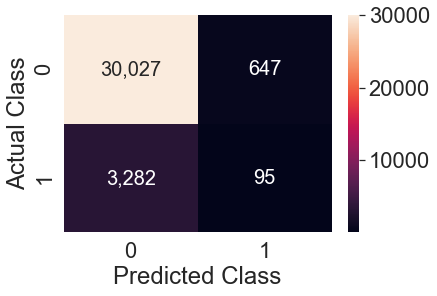

In [23]:
#Random forestmodel

from sklearn.metrics import confusion_matrix
cm_test =confusion_matrix(y_val, y_val_rf_pred)
rf_heatmap = confusion_matrix_heatmap(cm_test)

# Save the figure outside the function
rf_heatmap.savefig('G:\\My Drive\\A_2023FallUMBC/Capstone/dataset/final/RF_confusion_matrix_heatmap.png', bbox_inches='tight')

# Display the figure
plt.show()
#dementia = 1

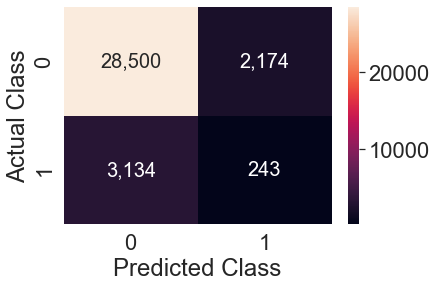

In [25]:
# decision tree model
from sklearn.metrics import confusion_matrix
cm_test =confusion_matrix(y_val, y_val_dt_pred)
confusion_matrix_heatmap(cm_test)
None

#dementia = 1

## ROC curve

In [26]:
#obtain the predicted probabilityes for each class
y_rf_val_pred_proba = rf_best_model.predict_proba(X_val)


In [27]:
y_rf_val_pred_proba

array([[0.967     , 0.033     ],
       [0.967     , 0.033     ],
       [0.97604762, 0.02395238],
       ...,
       [0.874     , 0.126     ],
       [0.7631409 , 0.2368591 ],
       [0.87192857, 0.12807143]])

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score


fpr, tpr, thresholds = roc_curve(y_val,y_rf_val_pred_proba[:, 1])
#To access the predicted probabilities for the positive class (class 1):y_rf_val_pred_proba[:, 1]

#The default threshold is 0.5; however, it could range from 0 to 1, and the classification results 
#may change accordingly. The area under the ROC (AUROC) summarizes thresholds changes of both 
#TPR (sensitivity) and FPR (1-specificity). 

In [29]:
roc_auc_score= roc_auc_score(y_val, y_rf_val_pred_proba[:, 1])
roc_auc_score

#A higher AUC indicates better discrimination ability. 
#AUC values close to 1 suggest good performance, 
#while an AUC of 0.5 indicates a classifier that performs no better than random chance.

0.5291277068859183

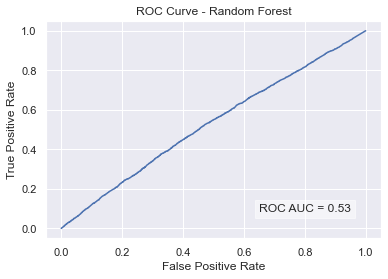

In [33]:
#plot ROC curve
sns.set(font_scale=1) 
fig, ax = plt.subplots()
ax.plot(fpr, tpr)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.title('ROC Curve - Random Forest')

# Add annotation for ROC AUC score
ax.text(0.8, 0.1, f'ROC AUC = {roc_auc_score:.2f}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

#plt.savefig('ROC_curve_val2.png')

plt.show()

## Learning Curve

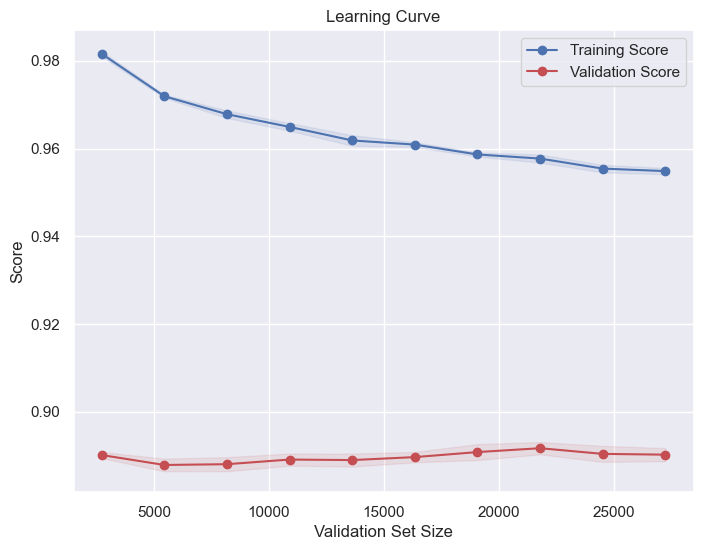

In [71]:

from sklearn.model_selection import learning_curve

# Use Random Forest Classifier model

# Define the learning curve parameters
train_sizes = np.linspace(0.1, 1.0, 10)  # Vary the validation set sizes
train_sizes, train_scores, val_scores = learning_curve(rf_best_model,X_val, y_val, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='r', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='r')
plt.xlabel('Validation Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)

#plt.savefig('learningCurve_val.png')

plt.show()

In [ ]:
plt.savefig('learningCurve_val.png')